In [35]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit

1) Hysterese
=========

In [36]:
#Hysteresis
I_down=np.array([13.0,11.0,9.0,7.0,5.0,3.0,1.0])
I_up=np.array([1.0,3.0,5.0,7.0,9.0,11.0,13.0])
I_all=np.array([13.0,11.0,9.0,7.0,5.0,3.0,1.0,1.0,3.0,5.0,7.0,9.0,11.0,13.0])
dI=0.3
B_down = np.array([0.343,0.247, 0.203, 0.140, 0.097, 0.057, 0.023]) #mT
dB_down=np.array([0.025, 0.017, 0.012, 0.008, 0.017, 0.005, 0.005])
B_all=np.array([0.343,0.247, 0.203, 0.140, 0.097, 0.057, 0.023,0.020, 0.070, 0.103, 0.123, 0.150, 0.23, 0.28])
dB_all=np.array([0.025, 0.017, 0.012, 0.008, 0.017, 0.005, 0.005,0.008,0.008,0.005,0.005,0.008,0.008,0.008])
B_up = np.array([0.020, 0.070, 0.103, 0.123, 0.150, 0.23, 0.28])
dB_up = np.array([0.008,0.008,0.005,0.005,0.008,0.008,0.008])

In [37]:
def gaussian(value, sigma, avg):
    return 1/sigma/np.sqrt(2*math.pi)*np.exp(-((value-avg)/sigma)**2/2)

A 0.0225077360384 +- 0.00143726112199
B -0.00583028220757 +- 0.0068232446689


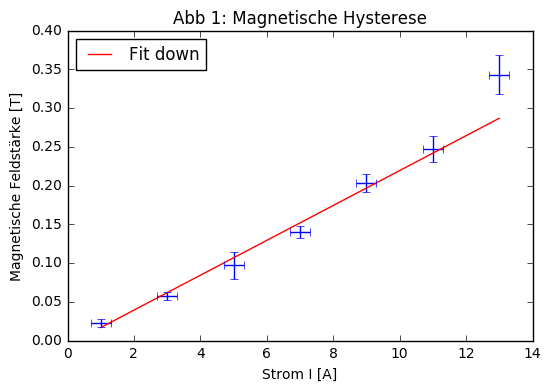

In [38]:
def Bfit(x,A,B):
    return A*x+B

popt, pcov=curve_fit(Bfit,I_down, B_down, sigma=dB_down)

plt.plot(I_down, Bfit(I_down,*popt), "-r", label="Fit down")
plt.errorbar(I_down, B_down, xerr=dI, yerr=dB_down, fmt="none")

plt.title("Abb 1: Magnetische Hysterese")
plt.xlabel("Strom I [A]")
plt.ylabel("Magnetische Feldstärke [T]")
plt.legend(loc="best")
plt.savefig("Hysterese.pdf")
print("A", popt[0], "+-", pcov[0,0]**0.5)
print("B", popt[1], "+-", pcov[1,1]**0.5)

A 0.0203127055833 +- 0.00193052440177
B -0.00464589152856 +- 0.014494059171


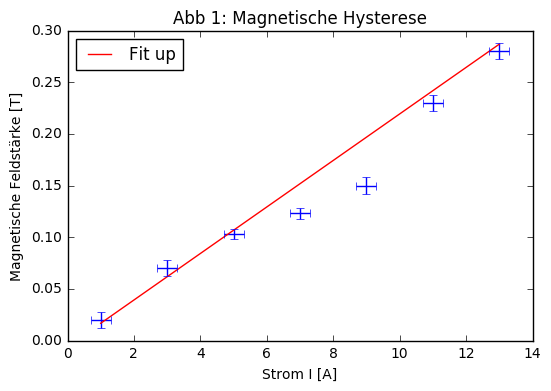

In [39]:
popt1, pcov1=curve_fit(Bfit,I_up, B_up, sigma=dB_up)
plt.plot(I_up, Bfit(I_up,*popt), "-r", label="Fit up")
plt.errorbar(I_up, B_up, xerr=dI, yerr=dB_up, fmt="none")

plt.title("Abb 1: Magnetische Hysterese")
plt.xlabel("Strom I [A]")
plt.ylabel("Magnetische Feldstärke [T]")
plt.legend(loc="best")
plt.savefig("Hysterese1.pdf")
print("A", popt1[0], "+-", pcov1[0,0]**0.5)
print("B", popt1[1], "+-", pcov1[1,1]**0.5)

A 0.0205607247095 +- 0.00112631006555
B -0.00315843302625 +- 0.00733468400318


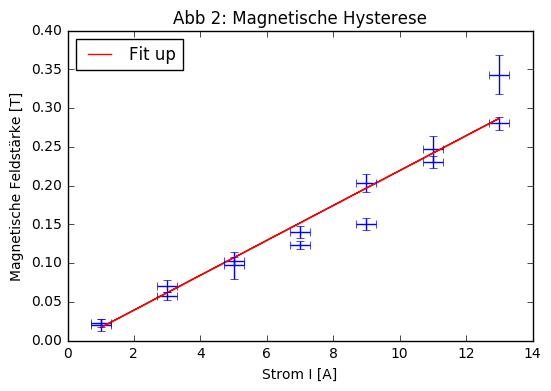

In [40]:
popt2, pcov2=curve_fit(Bfit,I_all, B_all, sigma=dB_all)
plt.plot(I_all, Bfit(I_all,*popt), "-r", label="Fit up")
plt.errorbar(I_all, B_all, xerr=dI, yerr=dB_all, fmt="none")

plt.title("Abb 2: Magnetische Hysterese")
plt.xlabel("Strom I [A]")
plt.ylabel("Magnetische Feldstärke [T]")
plt.legend(loc="best")
plt.savefig("Hysterese2.pdf")
print("A", popt2[0], "+-", pcov2[0,0]**0.5)
print("B", popt2[1], "+-", pcov2[1,1]**0.5)

In [41]:
print("10A",Bfit(10,popt2[0],popt2[1]),"+-", pcov2[0,0]**0.5 *10+pcov2[1,1]**0.5)
print("12A",Bfit(12,popt2[0],popt2[1]), "+-", pcov2[0,0]**0.5 *12+pcov2[1,1]**0.5)
print("13A",Bfit(13,popt2[0],popt2[1]), "+-",pcov2[0,0]**0.5 *13+pcov2[1,1]**0.5)

10A 0.202448814069 +- 0.0185977846587
12A 0.243570263488 +- 0.0208504047898
13A 0.264130988198 +- 0.0219767148553


2)